# Import and Read Data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [6]:
data=pd.read_csv("covid_19_clean_complete.csv")
df = data.copy()

# Preprocessing

In [7]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [8]:
df.shape

(49068, 10)

In [9]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [10]:
df.duplicated().sum()

0

In [11]:
df.rename(columns={"Province/State":"Province_State",
                      "Country/Region":"Country_Region",
                      "WHO Region":"Who_Region"}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province_State  14664 non-null  object 
 1   Country_Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   Who_Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Who_Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [13]:
df.isnull().sum()

Province_State    34404
Country_Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
Who_Region            0
dtype: int64

In [14]:
df.drop(columns = "Province_State" , axis=1, inplace=True)
df.head()

,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Who_Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [15]:
df[df['Active'] < 0].head()

,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Who_Region
16238,China,19.1959,109.7453,2020-03-24,168,6,168,-6,Western Pacific
16499,China,19.1959,109.7453,2020-03-25,168,6,168,-6,Western Pacific
16760,China,19.1959,109.7453,2020-03-26,168,6,168,-6,Western Pacific
17021,China,19.1959,109.7453,2020-03-27,168,6,168,-6,Western Pacific
17282,China,19.1959,109.7453,2020-03-28,168,6,168,-6,Western Pacific


In [16]:
df.loc[df['Active'] < 0, 'Active'] = pd.NA
df.loc[df['Confirmed'] == 0, 'Confirmed']= pd.NA
df.isnull().sum()

Country_Region        0
Lat                   0
Long                  0
Date                  0
Confirmed         10059
Deaths                0
Recovered             0
Active               18
Who_Region            0
dtype: int64

In [17]:
df.dropna(inplace=True)
df.isnull().sum()   

Country_Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
Who_Region        0
dtype: int64

In [18]:
df.describe(include='object')

,Country_Region,Who_Region
count,38991,38991
unique,187,6
top,China,Europe
freq,6176,11649


In [19]:
sotred_by_Active=df.sort_values(by='Active', ascending=False).iloc[:10]
sotred_by_Active.head()

,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Who_Region
49030,US,40.0,-100.0,2020-07-27,4290259.0,148011,1325804,2816444.0,Americas
48769,US,40.0,-100.0,2020-07-26,4233923.0,146935,1297863,2789125.0,Americas
48508,US,40.0,-100.0,2020-07-25,4178970.0,146465,1279414,2753091.0,Americas
48247,US,40.0,-100.0,2020-07-24,4112531.0,145560,1261624,2705347.0,Americas
47986,US,40.0,-100.0,2020-07-23,4038816.0,144430,1233269,2661117.0,Americas


In [ ]:
# For Handle outlier
def handle_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = dataframe[(dataframe[column] < lower) | (dataframe[column] > upper)]
    return outliers

outlier_counts = {}

z = df[['Confirmed','Deaths','Recovered','Active']]
for col in z.columns:
    outliers = handle_outliers_iqr(z, col)
print(outliers)

       Confirmed  Deaths  Recovered     Active
1627      3554.0     125         80     3349.0
1888      3554.0     125         88     3341.0
2149      4903.0     162         90     4651.0
2410      5806.0     204        141     5461.0
2671      7153.0     249        168     6736.0
...          ...     ...        ...        ...
49030  4290259.0  148011    1325804  2816444.0
49031    21209.0     121      11674     9414.0
49032    15988.0     146       9959     5883.0
49044    10621.0      78       3752     6791.0
49050     7413.0     185       4027     3201.0

[6903 rows x 4 columns]


# Visualisation

In [21]:
df.columns

Index(['Country_Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Who_Region'],
      dtype='object')

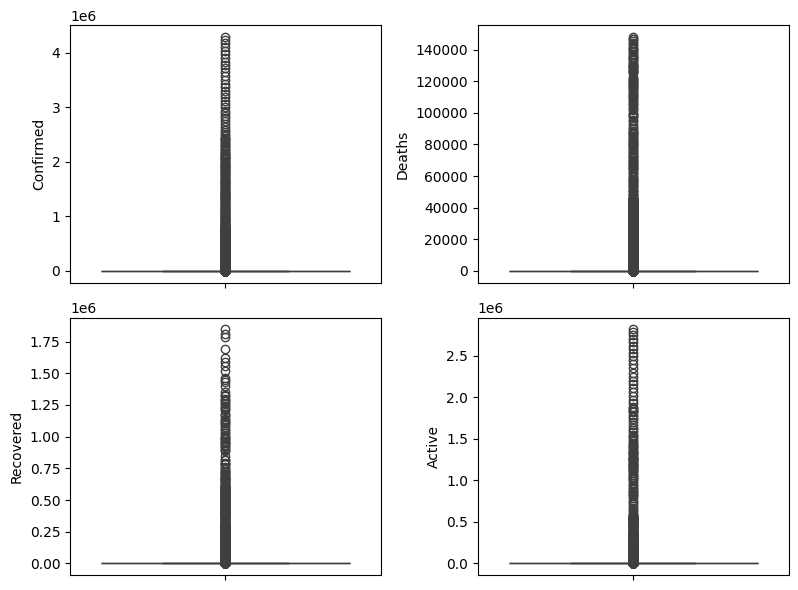

In [22]:
x = 1
plt.figure(figsize=(8, 6))
z = df[['Confirmed','Deaths','Recovered','Active']]
for col in z:
    plt.subplot(2, 2, x)
    sns.boxplot(df[col])
    x += 1
plt.tight_layout()
plt.show()

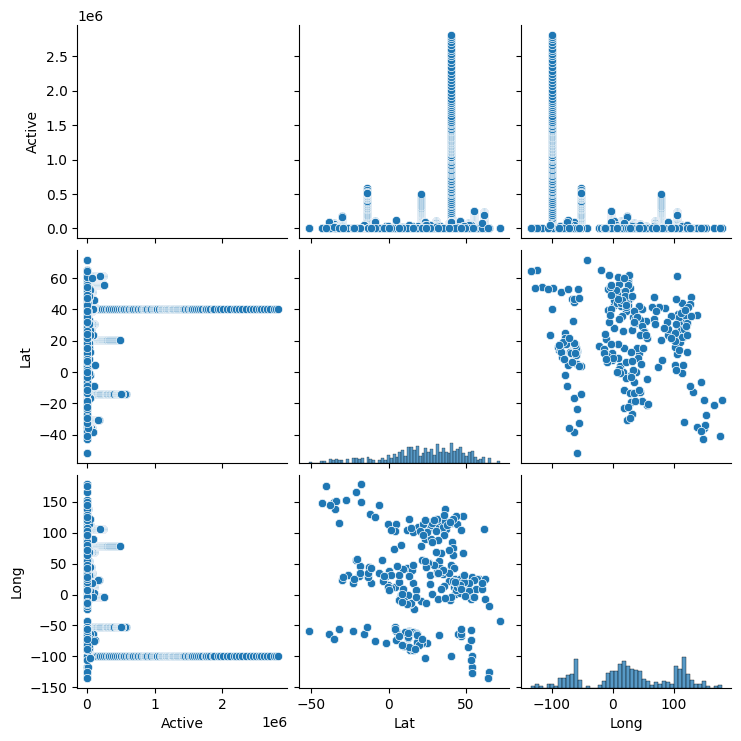

In [23]:
columns_plot = ['Active', 'Lat', 'Long']
sns.pairplot(df[columns_plot])

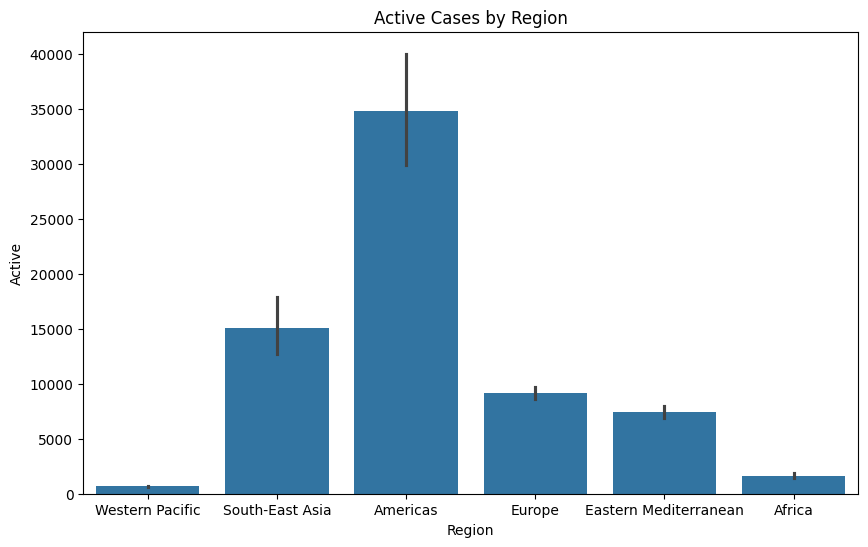

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Who_Region", y="Active", data=df)
plt.title('Active Cases by Region')
plt.xlabel("Region")
plt.ylabel("Active")
plt.show()

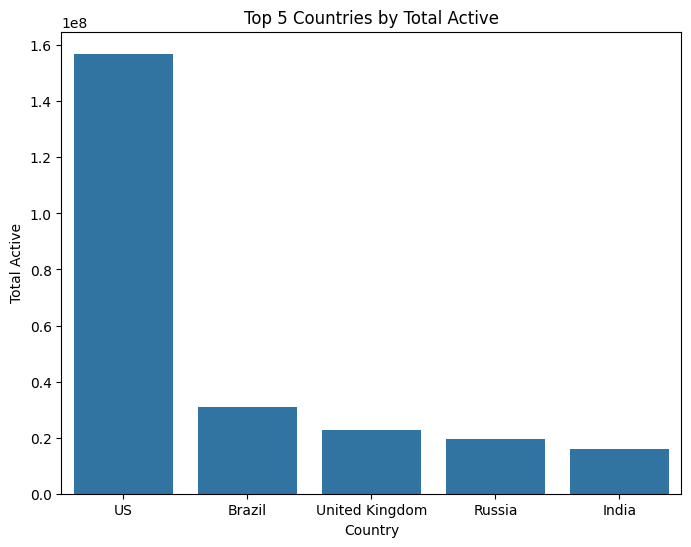

In [25]:
top_countries = df.groupby("Country_Region")["Active"].sum().reset_index()
top_countries = top_countries.sort_values(by="Active", ascending=False).head(5)
plt.figure(figsize=(8, 6))
sns.barplot(x="Country_Region", y="Active", data=top_countries)
plt.title("Top 5 Countries by Total Active")
plt.xlabel("Country")
plt.ylabel("Total Active")
plt.show()

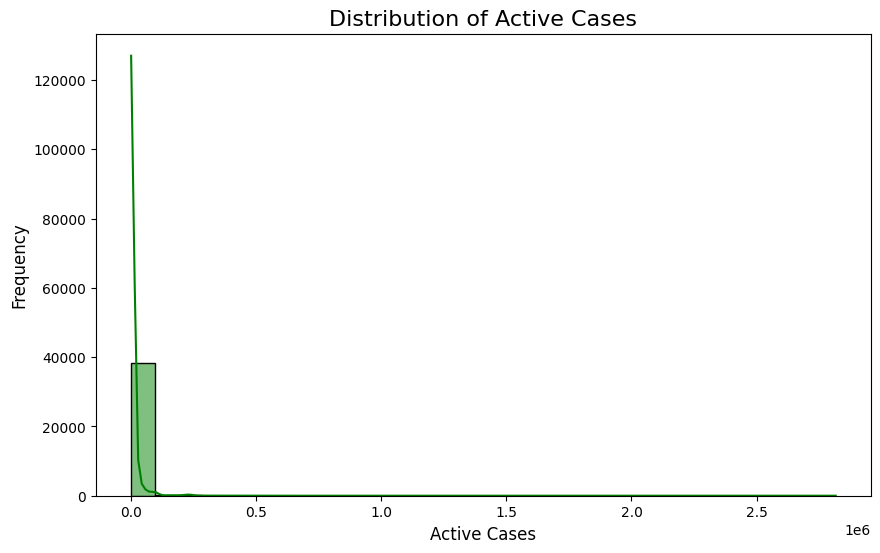

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Active'], kde=True, color='green', bins=30)
plt.title('Distribution of Active Cases', fontsize=16)
plt.xlabel('Active Cases', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

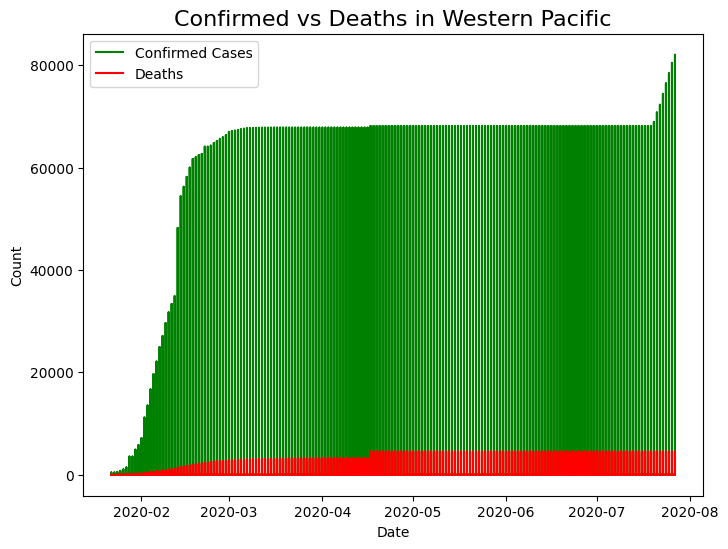

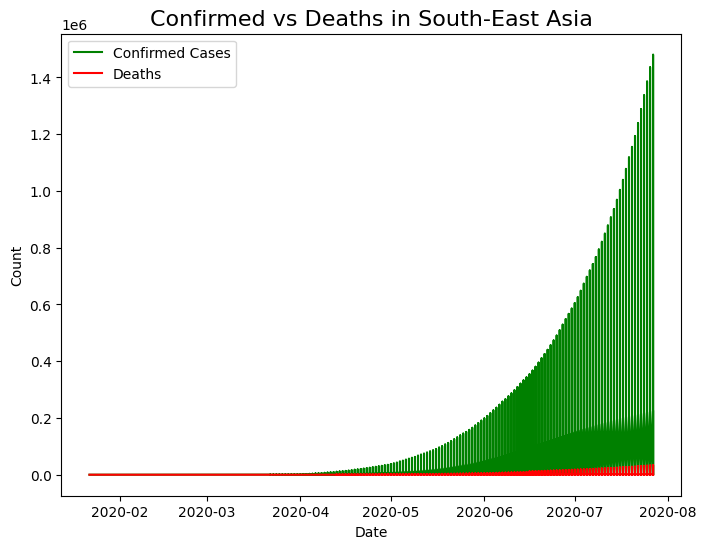

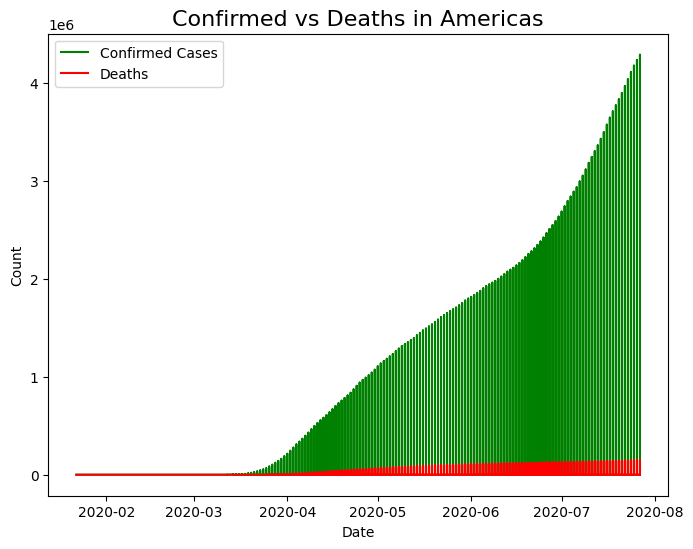

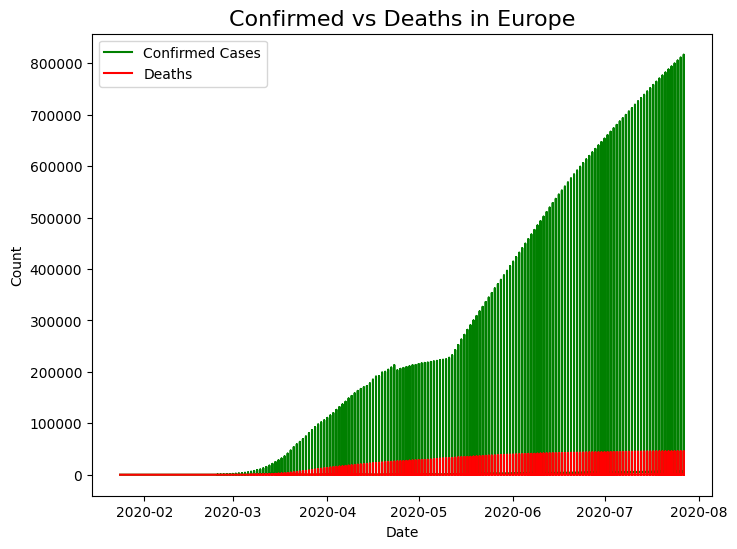

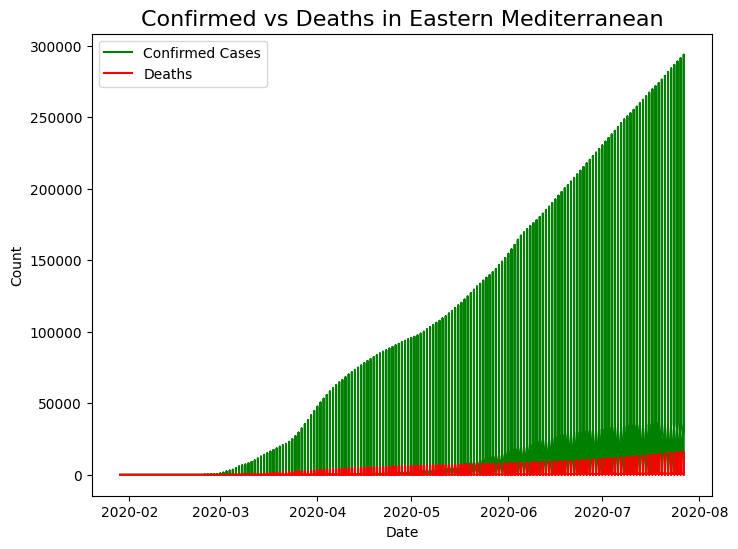

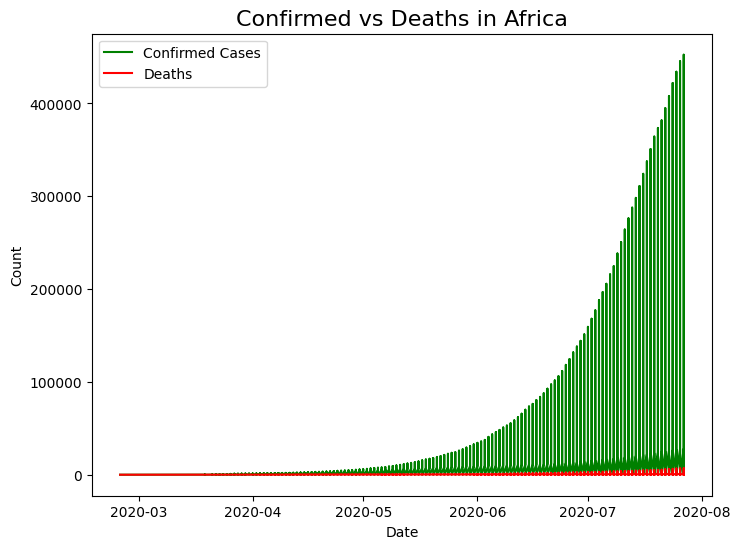

In [27]:
regions = df['Who_Region'].unique()
for region in regions:
    region_data = df[df['Who_Region'] == region]
    plt.figure(figsize=(8, 6))
    plt.plot(region_data['Date'], region_data['Confirmed'], color='green', label='Confirmed Cases')
    plt.plot(region_data['Date'], region_data['Deaths'], color='red', label='Deaths')
    plt.title(f'Confirmed vs Deaths in {region}', fontsize=16)
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

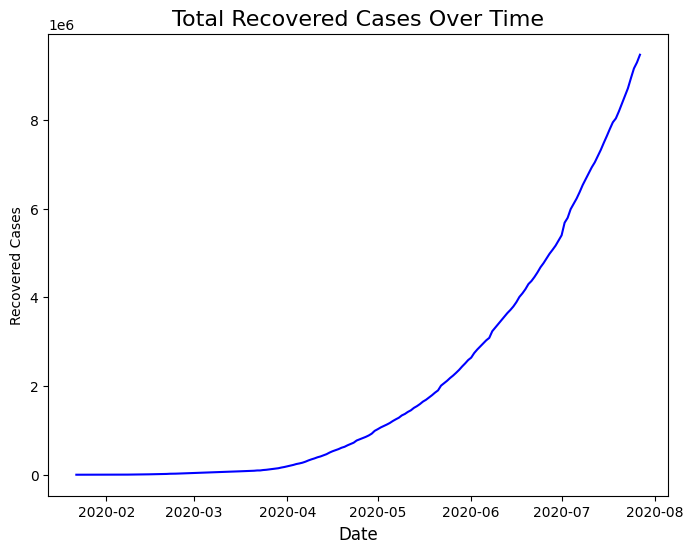

In [28]:
plt.figure(figsize=(8, 6))
conf = df.groupby('Date')['Recovered'].sum()
plt.plot(conf, label='Recovered Cases', color='blue')
plt.title('Total Recovered Cases Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Recovered Cases')
plt.show()
